### **REQUIREMENTS**



Tensorflow    (Version: 2.9.1 )

Numpy         (Version: 1.22.4)

Matplotlib    (Version: 3.5.2)

Scikit-learn  (Version: 1.1.1)

### **INSTALLATION INSTRUCTIONS**


In [19]:
#Run this cell incase you don't have the required libraries
# !pip install numpy
# !pip install tensorflow
# !pip install matplotlib
# !pip install scikit-learn

### **DATASET GENERATION**
-- Given the task of predicting the coordinates of a single bright pixel in a 50x50 image, we require a dataset where each image contains exactly one pixel with a value of 255, while all other pixels are set to 0.

--STEPS:
1. Generate Images: Create 50x50 images with a single pixel set to 255, and all others set to 0.
2. Generate Labels: The labels for each image will be the (x, y) coordinates of the bright pixel.

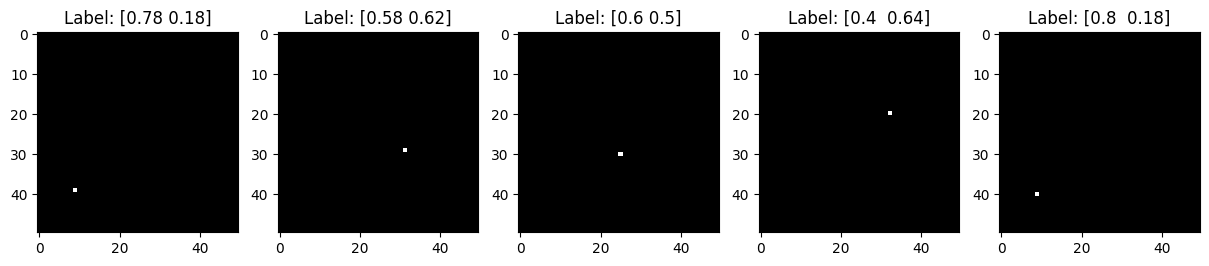

In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_dataset(num_samples=10000, img_size=50):
    images = np.zeros((num_samples, img_size, img_size), dtype=np.uint8)
    labels = np.zeros((num_samples, 2), dtype=int)  # Use built-in int

    for i in range(num_samples):
        x = random.randint(0, img_size-1)
        y = random.randint(0, img_size-1)
        images[i, x, y] = 255
        labels[i] = [x, y]

    return images, labels/50

# Generate dataset
images, labels = generate_dataset(num_samples=10000)

# Visualize some samples
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title(f"Label: {labels[i]}")
plt.show()


### **MODEL DESIGN**
-- We'll use a Convolutional Neural Network (CNN) to predict the coordinates. The model will take the 50x50 image as input and output two values (x, y).

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_model(input_shape=(50, 50, 1)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='sigmoid')  # Output layer with 2 neurons for (x, y) coordinates
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create model
model = create_model()
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 7744)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

### **DATA PREPROCESSING AND TRAINING**

In [22]:
# Normalize the images
images = images / 255.0
images = images.reshape(-1, 50, 50, 1)

# Split dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
200/200 [==============================] - 19s 90ms/step - loss: 0.0085 - mae: 0.0564 - val_loss: 0.0013 - val_mae: 0.0271
Epoch 2/10
200/200 [==============================] - 20s 99ms/step - loss: 0.0010 - mae: 0.0238 - val_loss: 6.4992e-04 - val_mae: 0.0187
Epoch 3/10
200/200 [==============================] - 18s 89ms/step - loss: 4.3685e-04 - mae: 0.0155 - val_loss: 6.2430e-04 - val_mae: 0.0187
Epoch 4/10
200/200 [==============================] - 18s 88ms/step - loss: 4.1902e-04 - mae: 0.0152 - val_loss: 2.8798e-04 - val_mae: 0.0127
Epoch 5/10
200/200 [==============================] - 19s 94ms/step - loss: 2.2266e-04 - mae: 0.0109 - val_loss: 1.8206e-04 - val_mae: 0.0097
Epoch 6/10
200/200 [==============================] - 18s 89ms/step - loss: 2.0338e-04 - mae: 0.0105 - val_loss: 2.6206e-04 - val_mae: 0.0123
Epoch 7/10
200/200 [==============================] - 18s 89ms/step - loss: 1.8144e-04 - mae: 0.0098 - val_loss: 1.8433e-04 - val_mae: 0.0101
Epoch 8/10
200/200

### **EVALUATION AND VISUALIZATION**

In [24]:
# Evaluate the model on test data
loss, mse = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MSE: {mse}")

# Predict on test data
predictions = model.predict(X_test)


63/63 [==============================] - 1s 22ms/step - loss: 1.2421e-04 - mae: 0.0079
Test Loss: 0.00012420830898918211, Test MSE: 0.00790634099394083
63/63 [==============================] - 1s 22ms/step


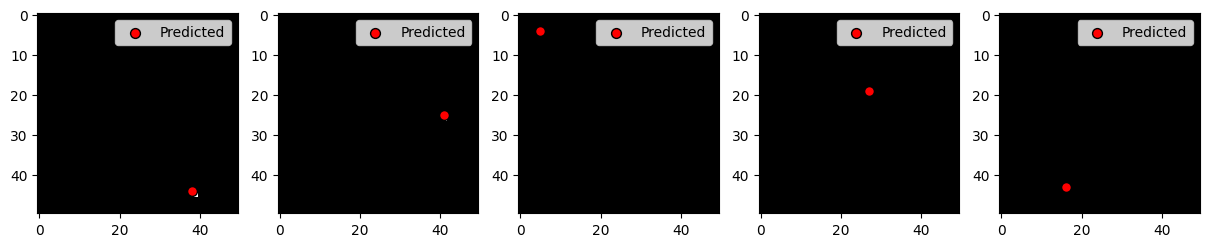

In [25]:
# Compare predictions with ground truth (no visualization of the ground truth dot)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(X_test[i].reshape(50, 50), cmap='gray')
    # Plot predictions in red
    axes[i].scatter(int(predictions[i][1]*50), int(predictions[i][0]*50), color='red', label='Predicted', s=50, edgecolor='black')
    axes[i].legend()
plt.show()


In [26]:
# Print actual and predicted coordinates for the first 5 test samples
for i in range(5):
    print(f"Sample {i+1}:")
    print(f"  Actual Coordinates: {y_test[i]}")
    print(f"  Predicted Coordinates: {predictions[i]}")

Sample 1:
  Actual Coordinates: [0.9  0.78]
  Predicted Coordinates: [0.8871177 0.7763674]
Sample 2:
  Actual Coordinates: [0.52 0.82]
  Predicted Coordinates: [0.51905537 0.82062423]
Sample 3:
  Actual Coordinates: [0.08 0.1 ]
  Predicted Coordinates: [0.09388624 0.10732713]
Sample 4:
  Actual Coordinates: [0.38 0.54]
  Predicted Coordinates: [0.3819631  0.54087186]
Sample 5:
  Actual Coordinates: [0.86 0.32]
  Predicted Coordinates: [0.868249   0.33014777]
